Exercise: Outlier removal using standard deviation and z score
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [108]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as pl

In [4]:
df = pd.read_csv(r'E:\Training\Python for Data Science\Python normal distribution\bhp.csv')

In [6]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [12]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

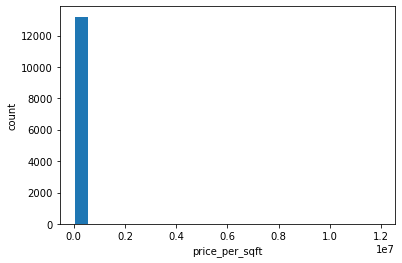

In [17]:
## Make a plot to see distribution 

plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

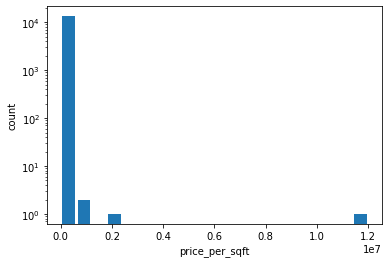

In [28]:
## make a log to visualization make it better

plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.yscale('log')
plt.show()

In [ ]:
sn.histplot(df.price_per_sqft, kde=True)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

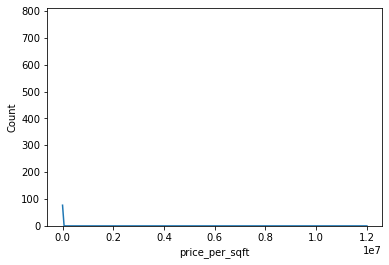

In [27]:
sn.histplot(df.price_per_sqft, kde=True)

In [47]:
## Treat using percentile because value in coloumn i to spread out 
## Use percentile tenchnique to find outlier

upper, lower = df.price_per_sqft.quantile([0.001,0.999])
upper, lower

(1366.184, 50959.36200000098)

In [86]:
df_outlier = df[(df.price_per_sqft > upper) | (df.price_per_sqft < lower)]
df_outlier.head(10)
df_outlier.shape

(13200, 7)

In [67]:
df2 = df[(df.price_per_sqft>upper) & (df.price_per_sqft<lower)]
df2.shape # nef dataframe has been cleaned by percentile technique

(13172, 7)

In [85]:
df2.shape[0] - df.shape[0]

-28

remove 28 outlier

# Use 4 standart deviation form dataframe that has cleaned before

In [70]:
mean = df2.price_per_sqft.mean()
std_deviation = df2.price_per_sqft.std()
mean, std_deviation

(6663.6537351958705, 4141.020700174605)

In [73]:
min_limit = mean - 4*std_deviation #batas minimum
min_limit

-9900.429065502549

In [74]:
max_limit = mean + 4*std_deviation #batas maksimum
max_limit

23227.73653589429

In [77]:
df2_outlier = df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)]
df2_outlier.shape

(125, 7)

In [83]:
df3 = df2[(df2.price_per_sqft<max_limit) & (df2.price_per_sqft>min_limit)]
df3.shape

(13047, 7)

Remove 125 outlier 

# Make plot histogram

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

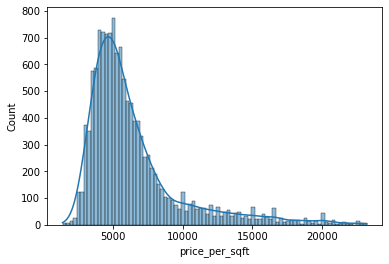

In [88]:
sn.histplot(df3.price_per_sqft, kde=True)

Text(0, 0.5, 'count')

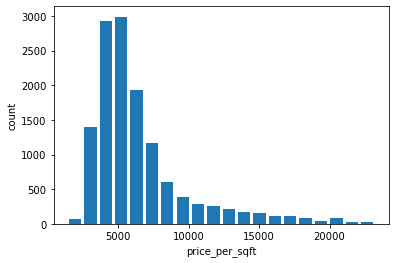

In [95]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

# Now using z score to remove outlier

In [100]:
df2['zscore_price_per_sqft'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\Asus\AppData\Local\Temp/ipykernel_13688/3700240044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore_price_per_sqft'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore_price_per_sqft
12086,Whitefield,2 BHK,1346.0,2.0,76.01,2,5647,-0.245508
7902,BTM Layout,3 BHK,1540.0,2.0,78.00,3,5064,-0.386295
1110,Choodasandra,2 BHK,1115.0,2.0,50.00,2,4484,-0.526357
10587,Hoodi,2 BHK,1225.0,2.0,45.00,2,3673,-0.722202
9366,Bannerghatta Road,2 BHK,905.0,2.0,65.00,2,7182,0.125174
11147,Yeshwanthpur,2 BHK,1162.0,2.0,64.08,2,5514,-0.277626
3356,other,6 Bedroom,1200.0,5.0,150.00,6,12500,1.409398
9022,5th Phase JP Nagar,2 BHK,1030.0,2.0,57.00,2,5533,-0.273037
6527,Kaggadasapura,3 BHK,1805.0,2.0,75.00,3,4155,-0.605806
10205,Electronic City,1 BHK,630.0,1.0,33.70,1,5349,-0.317471


In [105]:
outlier_z = df2[(df2.zscore_price_per_sqft>4) | (df2.zscore_price_per_sqft<-4)]
outlier_z.shape

(125, 8)

In [107]:
outlier_z.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore_price_per_sqft
9907,other,8 Bedroom,600.0,4.0,175.0,8,29166,5.434010
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
6959,Raja Rajeshwari Nagar,4 Bedroom,1350.0,4.0,340.0,4,25185,4.472652
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
10327,Cunningham Road,4 Bedroom,7500.0,6.0,1800.0,4,24000,4.186491
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
10972,other,4 BHK,8321.0,5.0,2912.0,4,34995,6.841634
3136,other,4 Bedroom,1200.0,4.0,350.0,4,29166,5.434010
3665,Koramangala,4 Bedroom,2400.0,6.0,600.0,4,25000,4.427977


find 125 outlier